In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Reading the Data File

In [3]:
df= pd.read_csv('bank_additional_full.csv')

print("Number of Rows :", df.shape[0])
print("Number of Columns :", df.shape[1])

Number of Rows : 41188
Number of Columns : 21


# Accessing the data types of the features

In [4]:
print("\nDatatypes of the Columns")
print('--------------------------------')
print("\nColumns with 'int' datatype : ")
for i in list(df.select_dtypes(include=['int64']).columns):
    print(i)

print('\n--------------------------------')
print("Columns with 'float' datatype : ")
for f in list(df.select_dtypes(include=['float64']).columns):
    print(f)

print('\n--------------------------------')
print("Columns with 'String' datatype : ")
for s in list(df.select_dtypes(include=['object']).columns):
    print(s)


Datatypes of the Columns
--------------------------------

Columns with 'int' datatype : 
age
duration
campaign
pdays
previous

--------------------------------
Columns with 'float' datatype : 
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed

--------------------------------
Columns with 'String' datatype : 
job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


# Checking for missing values

In [5]:
Missing_cloumns = df.columns[df.isnull().any()]
print("Total no. of Columns with Missing/NA Values : ", len(Missing_cloumns))
print("\nName of the Columns with Missing Values : ")
for i in Missing_cloumns:
      print(i)

Total no. of Columns with Missing/NA Values :  0

Name of the Columns with Missing Values : 


# Outliers Treatment 

In [6]:
def remove_outlier(df: pd.DataFrame, column: str, outlier_assumption: float) -> pd.DataFrame:
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    minimum = mean - outlier_assumption * std
    maximum = mean + outlier_assumption * std
    
    is_outlier = (df[column] < minimum) | (df[column] > maximum)
    df = df[~is_outlier]
    
    return df

In [7]:
df= remove_outlier(df, 'age', 2.5)
df= remove_outlier(df, 'campaign', 2.5)
df= remove_outlier(df, 'emp.var.rate', 2.5)
df= remove_outlier(df, 'cons.price.idx', 2.5)
df= remove_outlier(df, 'cons.conf.idx', 2.5)
df= remove_outlier(df, 'euribor3m', 2.5)
df= remove_outlier(df, 'nr.employed', 2.5)

In [8]:
print("Number of Rows after Outlier Treatment :", df.shape[0])

Number of Rows after Outlier Treatment : 37877


# Dropping Dupicate Values 

In [9]:
df.drop_duplicates(inplace=True)

# Treatment of the pdays and previous column 

In [10]:
is_pdays_999 = df['pdays'] == 999
df.loc[is_pdays_999, 'pdays_prcd'] = "never contacted"
df.loc[~is_pdays_999, 'pdays_prcd'] = pd.qcut(df.loc[~is_pdays_999, 'pdays'], 4, labels=["very recently contacted","recently contacted", "moderately recently contacted", "contacted long ago"])
df[['pdays_prcd', 'pdays']]

df.drop('pdays', 1, inplace= True)

C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/124154235.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('pdays', 1, inplace= True)


In [11]:
is_previous_0 = df['previous'] == 0
df.loc[is_previous_0, 'previous_prcd'] = "never contacted"
df.loc[~is_previous_0, 'previous_prcd'] = pd.cut(df.previous,bins=[0, 1, 4, 7],labels=["contacted once", "rarely contacted", "frequently contacted"])
df[['previous_prcd', 'previous']]

df.drop('previous', 1, inplace= True)

C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/1766373290.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('previous', 1, inplace= True)


In [12]:
# Coverting the values 'no' to 0 and 'yes' to 1 in the target variable

is_purchased = df['y'] == 'yes'
df.loc[is_purchased, 'target'] = 1
df.loc[~is_purchased, 'target'] = 0
df[['target', 'y']]
df.drop('y', 1, inplace= True)

C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/1798013201.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('y', 1, inplace= True)


# Checking for Multi-collinearity 

In [13]:
df_num= df[['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','target']]
corr_num = df_num.corr()
corr_num

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
age,1.000000,-0.006533,0.006865,0.081805,0.054803,0.109817,0.091992,0.077756,-0.024282
duration,-0.006533,1.000000,-0.037407,-0.014347,0.005760,-0.012030,-0.017094,-0.024586,0.423341
campaign,0.006865,-0.037407,1.000000,0.101983,0.087991,-0.007157,0.082031,0.095606,-0.046047
emp.var.rate,0.081805,-0.014347,0.101983,1.000000,0.845128,0.328490,0.978759,0.954685,-0.257237
cons.price.idx,0.054803,0.005760,0.087991,0.845128,1.000000,0.191002,0.805968,0.735549,-0.185207
cons.conf.idx,0.109817,-0.012030,-0.007157,0.328490,0.191002,1.000000,0.397967,0.217534,0.027758
euribor3m,0.091992,-0.017094,0.082031,0.978759,0.805968,0.397967,1.000000,0.962594,-0.248359
nr.employed,0.077756,-0.024586,0.095606,0.954685,0.735549,0.217534,0.962594,1.000000,-0.274342
target,-0.024282,0.423341,-0.046047,-0.257237,-0.185207,0.027758,-0.248359,-0.274342,1.000000


In [14]:
# Dropping the features - emp.var.rate and nr.employed to reduce multi-collinearity
# Dropping duration column because one can not know call duration before making the call

df.drop('duration',1,inplace=True)
df.drop('emp.var.rate',1,inplace=True)
df.drop('nr.employed',1,inplace=True)

C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/3660247417.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('duration',1,inplace=True)
C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/3660247417.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('emp.var.rate',1,inplace=True)
C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/3660247417.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('nr.employed',1,inplace=True)


In [15]:
df_feature= df.drop('target',1)
df_target= df[['target']]

C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/4217337674.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_feature= df.drop('target',1)


In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'pdays_prcd',
       'previous_prcd', 'target'],
      dtype='object')

In [17]:
print(Counter(df['target']))

Counter({0.0: 34314, 1.0: 3552})


# Encoding the Categorical Variables

In [18]:
# Label encode categorical variables

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [19]:
encoded_df = MultiColumnLabelEncoder(columns = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
                                               'poutcome', 'pdays_prcd', 'previous_prcd']).fit_transform(df)

In [20]:
# Saving the encoded data

encoded_df.to_csv('Encoded_Bank.csv')

In [21]:
encoded_df= encoded_df.drop('target',1)

C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/442209963.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  encoded_df= encoded_df.drop('target',1)


In [22]:
# Split the raw data into train and test set. Split ratio = 70:30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df, df_target, test_size=0.30, random_state=12)


In [23]:
col_list = list(X_train.columns)
X_train.index = pd.RangeIndex(len(X_train.index))
y_train.index = pd.RangeIndex(len(y_train.index))
X_test.index = pd.RangeIndex(len(X_test.index))
y_test.index = pd.RangeIndex(len(y_test.index))

In [24]:
## Apply standard scaler on the features , so that euclidean distance calculation in SMOTE is not biased
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train = pd.DataFrame(X_train, index=range(X_train.shape[0]),
                          columns=col_list)
X_test = pd.DataFrame(X_test, index=range(X_test.shape[0]),
                          columns=col_list)

# Data Balancing using Smote EN

In [26]:
from imblearn.over_sampling import SMOTENC

sm_en = SMOTENC(random_state=42, categorical_features=[1,2,3,4,5,6,7,8,9,11,15,16])
X_res_en, y_res_en = sm_en.fit_resample(X_train, y_train)

In [27]:
#Checking the Distribution after applying Smote 

df['New_en'] = y_res_en
print(Counter(df['New_en']))

Counter({0.0: 23071, 1.0: 14795})


# Machine Learning Model 

##  Random Forest with Smote NC Approach

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF_sm_en = RandomForestClassifier()
y_pred = RF_sm_en.fit(X_res_en, y_res_en).predict(X_test)

C:\Users\rdrl\AppData\Local\Temp/ipykernel_652/129712566.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF_sm_en.fit(X_res_en, y_res_en).predict(X_test)


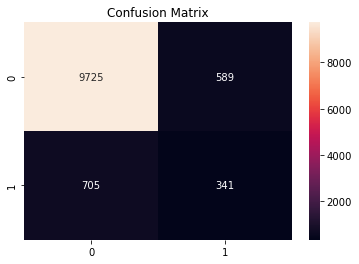

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [31]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8860915492957746
Precision = 0.36666666666666664
Recall = 0.3260038240917782
F1 Score = 0.34514170040485825


ROC AUC = 0.7271521268498036


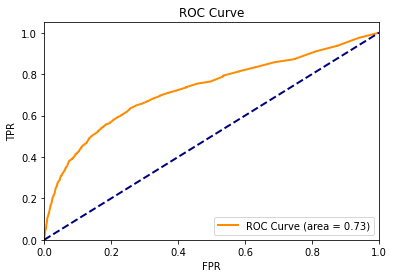

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF_sm_en.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()